**AZ Watch** is a popular video streaming platform specialized in educational content, where creators publish online video tutorials and lessons about any topic, from speaking a new language to cooking to learning to play a musical instrument.

Their next goal is to leverage AI-driven solutions to analyze and make predictions about their subscribers and improve their marketing strategy around attracting new subscribers and retaining current ones. This project uses machine learning to predict subscribers likely to churn and find customer segments. This may help AZ Watch find interesting usage patterns to build subscriber personas in future marketing plans!

![Woman working on multiple screens](marketinganalytics.jpg)


The `data/AZWatch_subscribers.csv` **dataset** contains information about subscribers and their status over the last year:

|Column name|Description|
|-----------|-----------|
|`subscriber_id`|The unique identifier of each subscriber user|
|`age_group`|The subscriber's age group|
|`engagement_time`|Average time (in minutes) spent by the subscriber per session|
|`engagement_frequency`|Average weekly number of times the subscriber logged in the platform (sessions) over a year period|
|`subscription_status`|Whether the user remained subscribed to the platform by the end of the year period (subscribed), or unsubscribed and terminated her/his services (churned)|

Carefully observe and analyze the features in the dataset, asking yourself if there are any **categorical attributes** requiring pre-processing?

The subscribers dataset from the `data/AZWatch_subscribers.csv` file is already being loaded and split into training and test sets for you:

In [10]:
# Import the necessary modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

# Specify the file path of your CSV file
file_path = "AZWatch_subscribers.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Separate predictor variables from class label
X = df.iloc[:, 1:4].values
y = df.iloc[:, -1].values



In [11]:
# Start your code here! Use as many cells as you like!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subscriber_id         1000 non-null   int64  
 1   age_group             1000 non-null   object 
 2   engagement_time       1000 non-null   float64
 3   engagement_frequency  1000 non-null   int64  
 4   subscription_status   1000 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [12]:
X

array([['18-34', 5.55, 7],
       ['under 18', 5.12, 12],
       ['35 and over', 4.25, 4],
       ...,
       ['35 and over', 2.37, 5],
       ['18-34', 8.19, 8],
       ['35 and over', 3.78, 8]], dtype=object)

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
ohe = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ohe.fit_transform(X))



In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [16]:
# Split intro training and test sets (20% test)
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=.2, random_state=42)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, random_state=None, max_leaf_nodes=None)
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)

In [19]:
acc1 = accuracy_score(y_test, y_pred1)
print(acc1)

0.88


In [20]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=100, criterion='entropy')
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

acc2 = accuracy_score(y_test, y_pred2)
print(acc2)


0.885


In [21]:
from  sklearn.svm import SVC
model3 = SVC(kernel = 'linear', random_state = 0).fit(X_train, y_train)
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)

score = accuracy_score(y_test, y_pred3)

In [22]:
print(score)

0.925


In [26]:
from sklearn.preprocessing import StandardScaler
segmentation = np.delete(X, 0, axis=1)

ss = StandardScaler()

seg_nom= ss.fit_transform(segmentation)

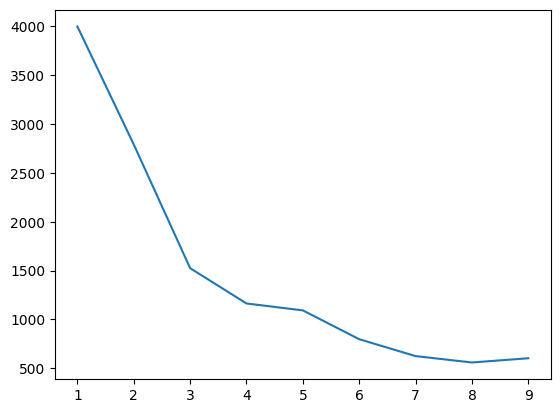

In [27]:
from sklearn.cluster import KMeans
elbows = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=None,algorithm='lloyd')
    kmeans.fit(seg_nom)
    elbows.append(kmeans.inertia_)

plt.plot(range(1, 10), elbows)





In [28]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, algorithm='lloyd')
y_predScatter = kmeans.fit_predict(seg_nom)

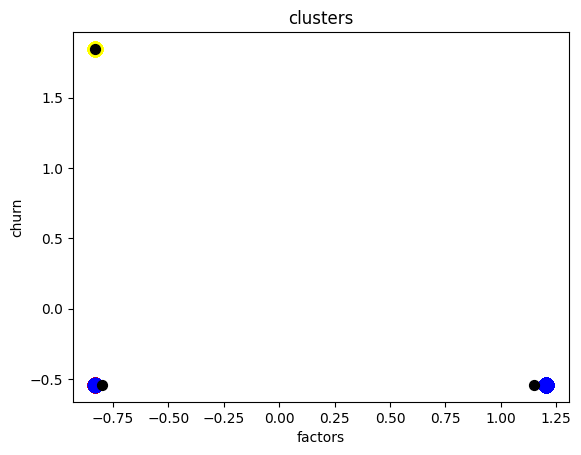

In [31]:
plt.scatter(seg_nom[y_predScatter==0, 0], seg_nom[y_predScatter==0, 1], s = 100, color='red', label='cluster1')
plt.scatter(seg_nom[y_predScatter==1, 0], seg_nom[y_predScatter==1, 1], s =100, color = 'blue', label='cluster2')
plt.scatter(seg_nom[y_predScatter==2, 0], seg_nom[y_predScatter==2, 1], s =100, color = 'yellow', label='cluster3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 50, color = 'black', label='centers')
plt.title("clusters")
plt.xlabel("factors")
plt.ylabel("churn")
plt.show()


In [33]:
X_df["cluster_id"] = kmeans.labels_

In [34]:
X_df["cluster_id"]

,cluster_id
0,0
1,2
2,1
3,0
4,0
...,...
995,1
996,1
997,1
998,0


In [36]:
X_df

,0,1,2,3,4,cluster_id
0,1.0,0.0,0.0,5.55,7,0
1,0.0,0.0,1.0,5.12,12,2
2,0.0,1.0,0.0,4.25,4,1
3,1.0,0.0,0.0,8.54,15,0
4,1.0,0.0,0.0,12.12,20,0
...,...,...,...,...,...,...
995,0.0,1.0,0.0,3.12,23,1
996,0.0,1.0,0.0,5.25,8,1
997,0.0,1.0,0.0,2.37,5,1
998,1.0,0.0,0.0,8.19,8,0


In [37]:
analysis = X_df.groupby(['cluster_id']).agg({
    3: ['mean'],
    4:['mean']
}).round(0)
analysis

,3,4
,mean,mean
cluster_id,,
0,8.643231,11.62117
1,4.248792,8.615942
2,5.806652,9.863436
